In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
df= pd.read_csv('admission.csv')

In [12]:
df.shape

(400, 4)

In [13]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [14]:
### Check missing values
df.isnull().sum()

ADMIT    0
GRE      0
GPA      0
RANK     0
dtype: int64

In [15]:
### checking the duplicates
df.duplicated().sum()

np.int64(5)

In [16]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [17]:
df.duplicated().sum()

np.int64(0)

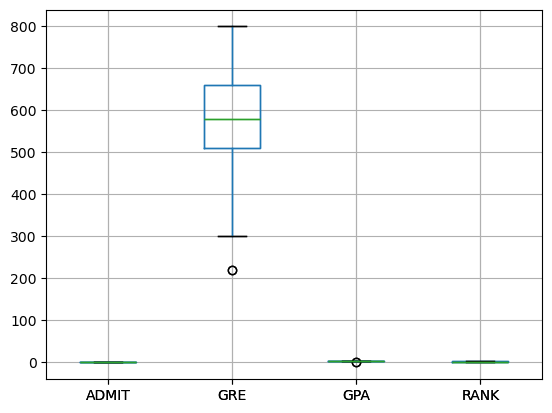

In [20]:
df.boxplot()
plt.show()

In [21]:

### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

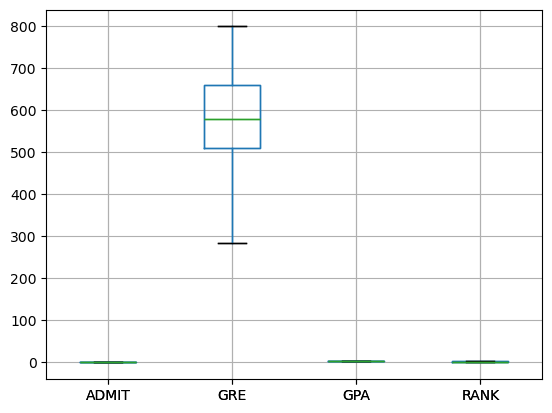

In [23]:
df.boxplot()
plt.show()

In [24]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380.0,3.61,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.93,4


In [26]:
target=df[['ADMIT']]
features= df.drop(columns=['ADMIT'])

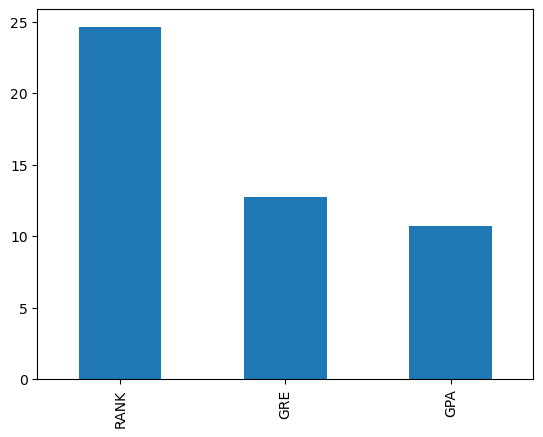

In [33]:
from sklearn.feature_selection import f_classif
f_clas= f_classif(features,target)
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [35]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 3)
(99, 3)
(296, 1)
(99, 1)


In [40]:
std_sca=StandardScaler()
x_train[['GRE','GPA']]= std_sca.fit_transform(x_train[['GRE','GPA']])

In [43]:
x_test[['GRE','GPA']]= std_sca.transform(x_test[['GRE','GPA']])

In [44]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [45]:
log_model.coef_

array([[ 0.27902416,  0.23973572, -0.54233654]])

In [46]:
log_model.intercept_

array([0.46707475])

In [48]:
y_pred= log_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [47]:
### sigmoid values
log_model.predict_proba(x_test)

array([[0.68697176, 0.31302824],
       [0.4490515 , 0.5509485 ],
       [0.69228554, 0.30771446],
       [0.45380167, 0.54619833],
       [0.73134165, 0.26865835],
       [0.77880995, 0.22119005],
       [0.37293627, 0.62706373],
       [0.83391294, 0.16608706],
       [0.79881494, 0.20118506],
       [0.79026884, 0.20973116],
       [0.78122468, 0.21877532],
       [0.81659666, 0.18340334],
       [0.77060751, 0.22939249],
       [0.75921584, 0.24078416],
       [0.87810761, 0.12189239],
       [0.94187715, 0.05812285],
       [0.63976023, 0.36023977],
       [0.56793454, 0.43206546],
       [0.78314145, 0.21685855],
       [0.4417185 , 0.5582815 ],
       [0.89825254, 0.10174746],
       [0.73413075, 0.26586925],
       [0.84268567, 0.15731433],
       [0.85516103, 0.14483897],
       [0.64201568, 0.35798432],
       [0.83823751, 0.16176249],
       [0.80797509, 0.19202491],
       [0.85483215, 0.14516785],
       [0.57451428, 0.42548572],
       [0.90595163, 0.09404837],
       [0.